In [1]:

#this allows relative imports in notebook
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from UCLSE.environment import Market_session, yamlLoad
import pandas as pd
from UCLSE.plotting_utilities import bid_ask_window,demand_curve_intersect, bid_ask_last_plot


%matplotlib inline

# Market_session

The Market_session class is the coordinator between traders, exchange and supply_demand modules. It sets up the experiment, runs it and records the information.

In [2]:
pa=module_path
config_name='UCLSE\\test\\fixtures\\mkt_cfg.yml'
config_path=os.path.join(pa,config_name)

environ_dic=yamlLoad(config_path)
environ_dic['trade_file']='avg_balance.csv'
environ_dic['trade_record']= 'transactions.csv'

The instantiation of the class requires multiple parameters. Most of them are recognisable from the previous tutorial on the supply_demand class. The new elements here include the buyers spec where the population of trading agents is defined.

In [3]:

environ_dic={
'start_time': 0.0,
 'end_time': 600.0, #how long the experiment goes on for
 'supply_price_low': 95,
 'supply_price_high': 95,
 'demand_price_low': 105,
 'demand_price_high': 105,
 'interval': 30,
 'timemode': 'drip-poisson',
 'buyers_spec': {'GVWY': 10, 'SHVR': 10, 'ZIC': 10, 'ZIP': 10}, #how many of each type of trader we want
 'sellers_spec': {'GVWY': 10, 'SHVR': 10, 'ZIC': 10, 'ZIP': 10},
 'verbose': False,
 'trade_file': 'avg_balance.csv', #profit and loss summary by trader type
 'trade_record': 'transactions.csv', #list of all transactions
 'dump_each_trade': True} #record each trade

Define Market_session object

In [4]:
sess=Market_session(**environ_dic)

It has an associated exchange

In [5]:
sess.exchange

No orders in exchange order book

Associated traders

In [6]:
sess.traders

{'B00': <UCLSE.traders.Trader_Giveaway at 0x1a31dd3b6a0>,
 'B01': <UCLSE.traders.Trader_Giveaway at 0x1a31dd3b630>,
 'B02': <UCLSE.traders.Trader_Giveaway at 0x1a31dd3b6d8>,
 'B03': <UCLSE.traders.Trader_Giveaway at 0x1a31dd3b588>,
 'B04': <UCLSE.traders.Trader_Giveaway at 0x1a31dd3b208>,
 'B05': <UCLSE.traders.Trader_Giveaway at 0x1a31dd3b128>,
 'B06': <UCLSE.traders.Trader_Giveaway at 0x1a31dd3b240>,
 'B07': <UCLSE.traders.Trader_Giveaway at 0x1a31dd3b3c8>,
 'B08': <UCLSE.traders.Trader_Giveaway at 0x1a31dd3b358>,
 'B09': <UCLSE.traders.Trader_Giveaway at 0x1a31dd3b320>,
 'B10': <UCLSE.traders.Trader_Shaver at 0x1a31dd3b518>,
 'B11': <UCLSE.traders.Trader_Shaver at 0x1a31dd3b160>,
 'B12': <UCLSE.traders.Trader_Shaver at 0x1a31dc7a0b8>,
 'B13': <UCLSE.traders.Trader_Shaver at 0x1a320923e80>,
 'B14': <UCLSE.traders.Trader_Shaver at 0x1a320952240>,
 'B15': <UCLSE.traders.Trader_Shaver at 0x1a3209526a0>,
 'B16': <UCLSE.traders.Trader_Shaver at 0x1a320952080>,
 'B17': <UCLSE.traders.Trade

and associated supply and demand

In [7]:
sess.sd

The principle method is simulate() which runs the experiment and will save the profit and loss of the traders in a csv as well as the transaction record.

In [8]:
sess.simulate(sess.trade_stats_df3,recording=True)

avg_balance.csv


All transactions are stored at the exchange. Cancels occur when traders are issued more orders than their limit (default 1); the old one is cancelled and replaced by the new one.

In [9]:
df=pd.DataFrame(sess.exchange.tape)
df

,order,p1_qid,p2_qid,party1,party2,price,qty,time,type
0,NaN,4.0,5.0,B30,S04,99.0,1.0,2.8125,Trade
1,NaN,11.0,13.0,S21,B22,98.0,1.0,4.2750,Trade
2,NaN,19.0,20.0,S18,B24,105.0,1.0,4.8125,Trade
3,NaN,25.0,27.0,B16,S00,96.0,1.0,5.6750,Trade
4,NaN,32.0,34.0,B29,S11,103.0,1.0,6.4250,Trade
5,NaN,35.0,37.0,B12,S09,101.0,1.0,6.6375,Trade
6,NaN,29.0,39.0,B25,S08,100.0,1.0,6.7250,Trade
7,NaN,43.0,50.0,S13,B31,95.0,1.0,7.5625,Trade
8,NaN,49.0,71.0,S03,B05,95.0,1.0,8.7500,Trade
9,NaN,82.0,110.0,S10,B18,95.0,1.0,11.3000,Trade


The state of the orderbook at the end of the period is:

In [10]:
print(sess.exchange)

                               tid     
otype                          Ask  Bid
price time     qid  oid   qty          
87.0  599.8875 7999 -1561 1    NaN  B39
95.0  597.8125 7960 -1545 1    NaN  B23
99.0  598.8500 7978 -1550 1    NaN  B28
      599.9875 8000 -1558 1    NaN  B36
102.0 599.8375 7997 -1549 1    NaN  B27
103.0 597.5500 7955 -1552 1    NaN  B30
104.0 598.5625 7971 -1559 1    NaN  B37
105.0 599.1250 7985 -1555 1    NaN  B33
      599.4375 7990 -1557 1    NaN  B35
      599.6500 7995 -1524 1    NaN  B02
108.0 599.5375 7992 -1560 1    NaN  B38
112.0 598.3250 7967 -1542 1    NaN  B20
128.0 598.4625 7969 -1574 1    S12  NaN
129.0 599.1500 7986 -1585 1    S23  NaN
      599.8625 7998 -1579 1    S17  NaN
134.0 599.7875 7996 -1592 1    S30  NaN
138.0 599.6125 7994 -1586 1    S24  NaN
140.0 599.0375 7982 -1601 1    S39  NaN
151.0 599.3250 7988 -1564 1    S02  NaN
170.0 599.5750 7993 -1515 1    S33  NaN


The recording=True flag records enough information from the experiment for it to be replayed exactly. When replaying all non-deterministic results are bypassed and replaced with their outputs from the first running of the experiment.  Originally this was to allow side by side testing when refactoring the code.

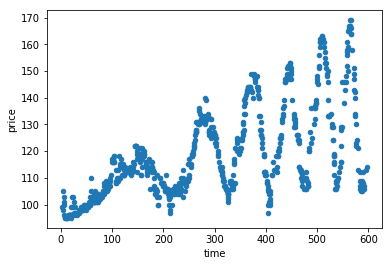

In [11]:
df[['time','price']].plot(x='time',y='price',kind='scatter')

We can look at the list of orders sent to the traders through this method

In [12]:
df=sess.create_order_list(sess)
df.tail()

,tid,otype,price,qty,time,qid,oid,time_issued
time,,,,,,,,
1970-01-01 00:09:57.028773585,S39,Ask,140.0,1,597.028774,None,-1601,597.0375
1970-01-01 00:09:58.243181818,B31,Bid,156.0,1,598.243182,None,-1553,598.2500
1970-01-01 00:09:58.788636364,B38,Bid,158.0,1,598.788636,None,-1560,598.8000
1970-01-01 00:09:59.292924528,S02,Ask,151.0,1,599.292925,None,-1564,599.3000
1970-01-01 00:09:59.858962264,S15,Ask,153.0,1,599.858962,None,-1577,599.8625


We really want to know a bit more about these orders - when were they cancelled or completed if at all? We can get a fuller picture by examining the records of the individual traders. This method does not require the session to be recorded.

In [13]:
order_list=sess.make_order_list(sess)
order_list

,tid,otype,price,qty,qid,oid,status,completion_time
issue_time,,,,,,,,
1970-01-01 00:00:00.894852941,B22,Bid,105.0,1,NaN,-24,complete,1970-01-01 00:00:04.275000000
1970-01-01 00:00:01.336029412,B30,Bid,105.0,1,NaN,-32,complete,1970-01-01 00:00:02.812500000
1970-01-01 00:00:01.619642857,S04,Ask,95.0,1,NaN,-46,complete,1970-01-01 00:00:02.812500000
1970-01-01 00:00:02.218382353,B29,Bid,105.0,1,NaN,-31,complete,1970-01-01 00:00:06.425000000
1970-01-01 00:00:02.691071429,S29,Ask,95.0,1,NaN,-71,complete,1970-01-01 00:00:14.475000000
1970-01-01 00:00:03.226785714,S21,Ask,95.0,1,NaN,-63,complete,1970-01-01 00:00:04.275000000
1970-01-01 00:00:03.226785714,S18,Ask,95.0,1,NaN,-60,complete,1970-01-01 00:00:04.812500000
1970-01-01 00:00:03.983088235,B31,Bid,105.0,1,NaN,-33,complete,1970-01-01 00:00:07.562500000
1970-01-01 00:00:03.983088235,B16,Bid,105.0,1,NaN,-18,complete,1970-01-01 00:00:05.675000000


We can create supply and demand curves from the orders issued to traders as before, calculate their intersect and plot them. 

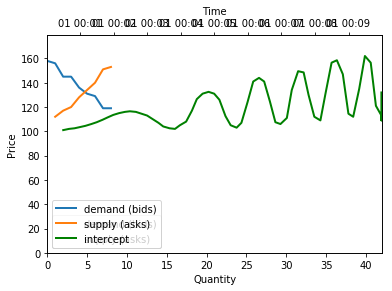

In [14]:
bids,asks,intersect=bid_ask_window(sess.sd,df,periods=30/sess.timer.step,step=10)
demand_curve_intersect(bids,asks,intersect,df,path='basic_animation.mp4',window='30s')

We can also use the replay vars to plot how the best bid ask evolved and where transactions were relative to the supply demand curve.

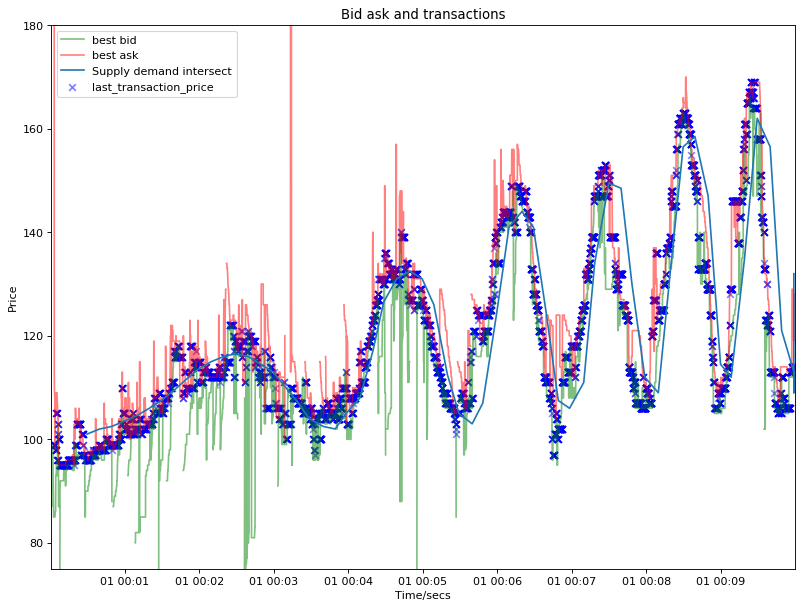

In [15]:
best_bid,best_ask,last_trans=sess.best_last(sess)
bid_ask_last_plot(best_bid,best_ask,last_trans,intersect)